# Facets of Mathematics: Week 5 <font color='red'>Solutions</font> 

## Aims

By the end of this notebook you should:

* Be able to find intersections of lines and conics in the complex plane $\mathbb{C}^2$.
* Be able to find the equation of a conic passing through a prescribed set of points. 
* Understand how to determine basic properties of a conic, such as (ir)reducibility and smoothness.

## Topics

* Lines in the complex plane
* Conics in the complex plane
* Tangent lines and singular points

Before attempting this notebook you should first have looked at the accompanying videos for week 5. 

This notebook combines explanations of the key week 5 concepts, with programming exercises which you should attempt by adding or editing code.

## References

**Algebriac geometry for sophomores:** I. Cheltsov, available from Learn
(Course Materials $\rightarrow$ Theme 2: Cubic Curves $\rightarrow$ Week 5 $\rightarrow$ Week 5 Tutorial)

* Lines in the complex plane: Section 1.a.
* Conics in the complex plane: Sections 1.b. and 1.c.
* Tangent lines and singular points: Section 1.d.


## Introduction to the theme

This theme is about properties of (algebraic) plane curves of small degree.
The only things you need to know are basics of linear algebra, how to solve simple polynomials equations and a smidgin of calculus.

You are probably already familiar with lines and conics. These are the plane curves of degree $1$ and $2$, respectively.
So the only new curves you are going to meet here are *cubic curves*.
They are simply the curves in the plane that are given by polynomial equations of degree $3$.
Cubic curves, also known as *elliptic curves*, play a very important role in Algebraic Geometry, Number Theory, and Cryptography.
One of the original seven Millennium Prize Problems set by the Clay Mathematics Institute in 2000 is about cubic curves;
it is known as the *Birch and Swinnerton-Dyer conjecture* and the prize for its correct proof is $\$1,000,000$!


The best way to learn about geometry of plane curves is to play with them. To make this more enjoyable, we will use Python to do all boring computations for us.


## 1. Lines in the plane

The simplest non-trivial problem in linear algebra is to solve the following system of linear equations:

$$
\left\{\begin{array}{rcl}
ax+by&=&\alpha,\\
cx+dy&=&\beta.\\
\end{array}
\right.
$$

Here $a$, $b$, $c$, $d$, $\alpha$ and $\beta$ are fixed *numbers*, while $x$ and $y$ are *variables*.
For example, if $a=4$, $b=-3$, $c=7$, $d=5$, $\alpha=17$, $\beta=11$, then we have the system

$$
\left\{\begin{array}{rcl}
4x-3y&=&17,\\
7x+5y&=&11.\\
\end{array}
\right.
$$

It has a unique solution: $x=\frac{118}{41}$ and $y=-\frac{75}{41}$.
This can be checked using the following Python script, where we import the ```SymPy``` library for symbolic computations:

In [1]:
# Import the sympy Python library for symbolic mathematics. 
# The * means that we are essentially importing everything from this library.

from sympy import *

# Introduce the variables x, y we'll be working with

x, y = symbols('x, y')

# Define the system of equations

E1 = 4 * x - 3 * y - 17
E2 = 7 * x + 5 * y - 11

# Use the solve command to solve the system of equations (E1, E2) in the variables x, y

solution = solve((E1, E2), x, y)

# Express the solution in the form of a coordinate pair

P = (solution[x], solution[y])

# Print the solution

print(P)

(118/41, -75/41)


Here ```P``` is the point $(x,y)$ that represents the solution.
If we solve a system of non-linear equations, the function ```solve``` can return many solutions,
so they are usually put in a tuple ```solution```.
However, in our case both equations are linear, so that ```solution``` is not a tuple.
Because of this, we have to access
its $x$-value and $y$-value as ```solution[x]``` and ```solution[y]```, respectively.

The geometrical meaning of the problem we just considered is very simple:
the point ```P``` is the intersection point of the line in the plane that is given by
the equation $4x-3y=17$ and the line that is given by the equation $7x+5y=11$.
In fact, you can use Python to plot this picture:

<IPython.core.display.Javascript object>


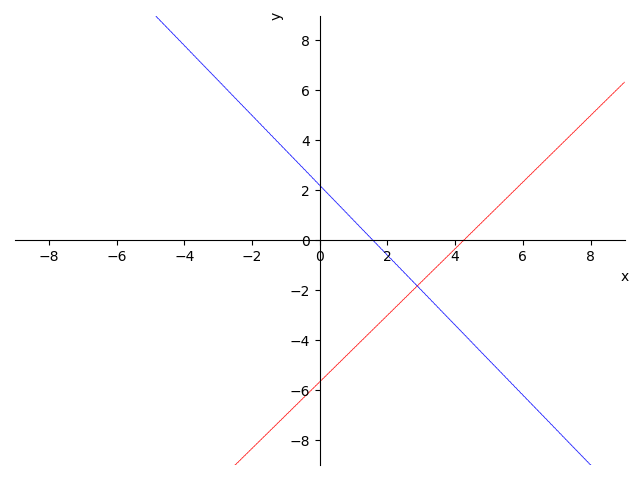

In [2]:
from sympy import *

%matplotlib notebook

x, y = symbols('x, y')

pic1 = plot_implicit(Eq(4 * x - 3 * y, 17), (x, -9, 9), (y, -9, 9), show=False, line_color='red')
pic2 = plot_implicit(Eq(7 * x + 5 * y, 11), (x, -9, 9), (y, -9, 9), show=False, line_color='blue')
pic1.extend(pic2)
pic1.show()

This script produces a picture containing both our lines together with their intersection point. Running the code, the red line is given by the equation $4x-3y=17$, and the blue line is given by $7x+5y=11$.

In our example, we considered two lines in the usual *real plane*, which is denoted by $\mathbb{R}^2$.
Here $\mathbb{R}^2$ stands for all possible pairs $(x,y)$ where $x$ and $y$ are *real* numbers.
However, quite often, we have to use *complex* numbers instead of *real* ones,
because polynomial equations always have solutions in the *complex* numbers (this fact is known as *Fundamental Theorem of Algebra*).

Let us show how to find the intersection point of two lines in $\mathbb{C}^2$.
Here $\mathbb{C}^2$ stands for all possible pairs $(x,y)$ where $x$ and $y$ are *complex* numbers, and we refer to $\mathbb{C}^2$ as the *complex plane*.
Let $L_1$ be the line in $\mathbb{C}^2$ given by

$$
(1+5i)x+(2-i)y=-7+3i,
$$

and let $L_2$ be the line in $\mathbb{C}^2$ given by

$$
(12-2i)x+(17+11i)y=-3-19i.
$$

Here, as usual, the symbol $i$ denotes the (imaginary) square root of $-1$.
Then to find the intersection point of the lines $L_1$ and $L_2$, we must solve the system of equations

$$
\left\{\begin{array}{rcl}
(1+5i)x+(2-i)y &=& -7+3i,\\
(12-2i)x+(17+11i)y &=& -3-19i.\\
\end{array}\right.
$$

Python can handle complex numbers, so that we can use its help here in the same way as we did earlier:

In [3]:
from sympy import *

x, y = symbols('x, y')

L1 = (1 + 5 * I) * x + (2 - 1 * I) * y + (7 - 3 * I)
L2 = (12 - 2 * I) * x + (17 + 11 * I) * y + (3 + 19 * I)

solution = solve((L1, L2), x, y)

P = (solution[x], solution[y])

print(P)

(2157/4036 + 3421*I/4036, -2451/2018 - 875*I/1009)


Note that Python uses symbol ```I``` for the square root of $-1$.
Running this script, we see that the intersection point $P$ is

$$
\Bigg(\frac{2157}{4036}+\frac{3421}{4036}i,-\frac{2451}{2018}-\frac{875}{1009}i\Bigg).
$$

### Exercise 1

Find the intersection point in $\mathbb{C}^2$ of the line given by

$$
(-13+17i)x+(23+29i)y=-11+3i
$$

and the line given by 

$$
(2-5i)x+(15+19i)y=37+41i.
$$

### <font color='red'>Solution</font> 

Let's use the following Python script:

In [4]:
from sympy import *

x, y = symbols('x, y')

L1 = (-13 + 17 * I) * x + (23 + 29 * I) * y + 11 - 3 * I
L2 = (2 - 5 * I) * x + (15 + 19 * I) * y - 37 - 41 * I

solution = solve((L1, L2), x, y)

P = (solution[x], solution[y])

print(P)

(-111972/253453 + 769040*I/253453, 416257/253453 + 25650*I/253453)


Running it,  we see that the intersection point is 

$$\Big(-\frac{111972}{253453} + \frac{769040}{253453}i, \frac{416257}{253453} + \frac{25650}{253453}i\Big).$$

So far, we have followed our noses and haven't given a formal definition of a *line* in $\mathbb{C}^2$. To be precise, a line in $\mathbb{C}^2$ is a subset given by

$$
ax+by=c
$$

for some fixed complex numbers $a$, $b$ and $c$ such that either $a\ne 0$ or $b\ne 0$ (or both).

For two distinct points in $\mathbb{C}^2$, there is a unique line containing them. Let's consider an example to illustrate this. If $P_1=(11,-7)$ and $P_2=(2,5)$, then to find the line $L$ in $\mathbb{C}^2$ that contains both these points, we have to solve the following system of equations:

$$
\left\{\begin{array}{rcl}
11a-7b &=& c,\\
2a+5b &=& c.\\
\end{array}\right.
$$

In particular, the roles of the coefficients and the variables have now switched. 

Since it is psychologically simpler to solve a system of equations with a unique solution, we may assume that either $a=1$ or $b=1$. Indeed, since $(a,b)\ne(0,0)$, we can scale the equation of the line $L$ either by $\frac{1}{a}$ or by $\frac{1}{b}$.
For instance, if we are sure that $b\ne 0$, then we can try to solve the following system:

$$
\left\{\begin{array}{rcl}
11a-7 &=& c,\\
2a+5 &=& c.
\end{array}\right.
$$

This can be done in Python as follows:

In [5]:
from sympy import *

# The variables a, b, c are used for the coefficients of the equation we are trying to find

a, b, c, x, y = symbols('a, b, c, x, y')

# Write the general form of the equation of a line

L = a * x + b * y - c

# Define the pair of fixed points

P1 = (11, -7)
P2 = (2, 5)

# P1 and P2 are stored as tuples, indexed starting from 0. For instance, the first entry of P1 is stored as P1[0].

# Form a system of equations in the coefficients a, b, c by substituting (x, y) = (P1[0], P1[1]) and (x, y) = (P2[0], P2[1])

E1 = L.subs(x, P1[0]).subs(y, P1[1])
E2 = L.subs(x, P2[0]).subs(y, P2[1])

# Solve the system (E1, E2, b - 1) in the coefficients (a, b, c). 
# Note the third equation fixes b = 1, as per the above discussion.

solution = solve((E1, E2, b - 1), a, b, c)

# Place the solution in a tuple

coeff = (solution[a], solution[b], solution[c])

# Obtain the desired equation for the line by substituting in the appropriate values of the coefficients.

L = L.subs(a, coeff[0]).subs(b, coeff[1]).subs(c, coeff[2])

# Print the solution

print(L, ' = 0')

4*x/3 + y - 23/3  = 0


Multiple use of subs can be avoided for multiple substitutions, although the resulting syntax can be a little convoluted. For instance, 

```L.subs(x, P1[0]).subs(y, P1[1])```

can be replaced with 

```L.subs(((x, P1[0]), (y, P1[1])))``` 

in the above script.

### Exercise 2

Find the equation of the line in $\mathbb{C}^2$ that passes through the following points: $(1+3i,7-2i)$ and $(3,8-i)$.

### <font color='red'>Solution</font> 

The line is given by $ax + by = c$ for some complex numbers $a$,  $b$ and $c$.
Thus,  we have to solve the system of equations

$$
\left\{\begin{array}{rcl}
&(1 + 3i)a + (7-2i)b = c, \\
&3a + (8-i)b = c.
\end{array}
\right.
$$

If $b\ne 0$,  we may assume that $b = 1$. Let's carry out these computations using the following Python script:

In [6]:
from sympy import *

a, b, c, x, y = symbols('a, b, c, x, y')

P1 = (1 + 3 * I, 7 - 2 * I)
P2 = (3, 8 - I)

L = a * x + b * y - c

E1 = L.subs(x, P1[0]).subs(y, P1[1])
E2 = L.subs(x, P2[0]).subs(y, P2[1])

solution = solve((E1, E2, b-1), a, b, c)
coeff = (solution[a], solution[b], solution[c])


L = L.subs(a, coeff[0]).subs(b, coeff[1]).subs(c, coeff[2])

print(L, ' = 0')

x*(1/13 - 5*I/13) + y - 107/13 + 28*I/13  = 0


Running this code,  we obtain the following equation:

$$
\Big(\frac{1}{13}-\frac{5}{13}i\Big)x + y = \frac{107}{13}-\frac{28}{13}i.
$$

This can be simplified by multiplying through by $13$ to give

$$
(1 - 5i)x + 13y = 107 - 28i.
$$

Finally, dividing through by $\frac{1 - 5i}{2}$,  we can rewrite the equation as

$$
2x + (1 + 5i)y = 19 + 39i.
$$

This simplification can be carried out using the following Python script:

In [7]:
from sympy import *

x, y = symbols('x, y')
print(simplify(2 * (x * (1 - 5 * I) + 13 * y - 107 + 28 * I)/(1 - 5 * I)), ' = 0')

2*x + y*(1 + 5*I) - 19 - 39*I  = 0


## 2. Conics in the plane

A conic in $\mathbb{C}^2$ is a subset given by a polynomial equation

$$
ax^{2}+bxy+cy^{2}+dx+ey+f=0,
$$

where $a$, $b$, $c$, $d$, $e$ and $f$ are complex numbers such that $(a,b,c)\ne(0,0,0)$. 

Polynomials of degree $2$ can sometimes split as a product of two polynomials of degree $1$: for example,

$$
x^2 - y^2 = (x-y)(x+y).
$$

In this case, we say that the polynomial and the corresponding conic are both *reducible*.
Similarly, if a polynomial of degree $2$ cannot be split as a product of linear factors, then it and the corresponding conic are said to be *irreducible*.

There are many ways to determine whether the given conic is irreducible or not.
For instance, we can rewrite the original equation $ax^{2}+bxy+cy^{2}+dx+ey+f=0$ in matrix form:

$$
\left(\begin{array}{ccc}
x & y & 1 \\
\end{array}\right)\left(\begin{array}{ccc}
a & \frac{b}{2} & \frac{d}{2} \\
\frac{b}{2} & c & \frac{e}{2} \\
\frac{d}{2} & \frac{e}{2} & f \\
\end{array}\right)\left(
\begin{array}{c}
x \\
y \\
1 \\
\end{array}\right)=0.
$$

Let $M$ be the $3\times 3$ matrix in this equation. Then the conic is irreducible if and only if $\mathrm{det}(M)\ne 0$.

For instance, the conic in $\mathbb{C}^2$ given by the equation

$$
(1+i)x^{2}-7xy+(3-2i)y^{2}+(2+5i)x+(-1+i)y-11+13i=0
$$

is irreducible. Indeed, this equation can be rewritten as

$$
\left(\begin{array}{ccc}
x & y & 1 \\
\end{array}\right)\left(\begin{array}{ccc}
1+i & -\frac{7}{2} & \frac{2+5i}{2} \\
-\frac{7}{2} & 3-2i & \frac{-1+i}{2} \\
\frac{2+5i}{2} & \frac{-1+i}{2} & -11+13i \\
\end{array}\right)\left(\begin{array}{c}
x \\
y \\
1 \\
\end{array}\right)=0.
$$

The determinant of the $3\times 3$ matrix in this equation is $\frac{337}{4}-125i\ne 0$,
which implies that this equation defines an irreducible conic in $\mathbb{C}^2$.
To compute the determinant of the above $3\times 3$ matrix, one may use the following Python script:

In [10]:
from sympy import *

# Define M to be the relevant matrix

M = Matrix([[1 + I, -7 / 2, (2 + 5 * I) / 2],
            [-7 / 2, 3 - 2 * I, (-1 + I) / 2],
            [(2 + 5 * I) / 2, (-1 + I) / 2, -11 + 13 * I]])

# Compute the determinant of M using M.det(), and then simplify the resulting expression using simplify

determinant = simplify(M.det())

print(determinant)

84.25 - 125.0*I


Note that it produces an answer in a decimal form.
If you do not like this, convert all rational numbers in this script into the elements of the class ```Rational```.
This can be done as follows:

In [11]:
from sympy import *

a11 = 1 + I
a12 = Rational(-7, 2)
a13 = 1 + Rational(5, 2) * I
a21 = a12
a22 = 3 - 2 * I
a23 = Rational(-1, 2) + Rational(1, 2) * I
a31 = a13
a32 = a23
a33 = -11 + 13 * I

M = Matrix([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])

determinant = simplify(M.det())

print(determinant)

337/4 - 125*I


We can be a little fancier and ask Python to interpret the result for us, using conditional statements. 

In [12]:
if determinant == 0:
    print('conic is reducible')
else:
    print('conic is irreducible')

conic is irreducible


Let's consider intersecting lines and conics in $\mathbb{C}^2$. This is fun!
Indeed, let $L$ be the line in $\mathbb{C}^2$ given by $2x+7y+19=0$, and let $C$ be the conic in $\mathbb{C}^2$ given by

$$
2x^{2}-3xy+7y^{2}-5x+11y-8=0.
$$

To find the intersection $L\cap C$, we have to solve the system of equations

$$
\left\{\begin{array}{rcl}
2x+7y+19 &=& 0,\\
2x^{2}-3xy+7y^{2}-5x+11y-8 &=& 0.\\
\end{array}\right.
$$

This can be done by using Python:

In [13]:
from sympy import *

x, y = symbols('x, y')

L = 2 * x + 7 * y + 19
C = 2 * x ** 2 - 3 * x * y + 7 * y ** 2 - 5 * x + 11 * y - 8

P = solve((L, C), x, y)

# Now we have a pair of solutions which are stored in a tuple P = (P[0], P[1])

print(P[0])
print(P[1])

(-19/12 - sqrt(215)*I/12, -95/42 + sqrt(215)*I/42)
(-19/12 + sqrt(215)*I/12, -95/42 - sqrt(215)*I/42)


Here ```P``` is a tuple of solutions that contains both intersection points ```P[0]``` and ```P[1]```.
Running this script, we see that the intersection $L\cap C$ consists of two points:

$$
\Big(-\frac{19}{12}\pm\frac{\sqrt{215}}{12}i,-\frac{95}{42}\mp\frac{\sqrt{215}}{42}i\Big).
$$

### Exercise 3

Let $C$ be the conic in $\mathbb{C}^2$ given by

$$
x^2+xy-2y^2+3x+3y+1=0,
$$

and let $L$ be the line in $\mathbb{C}^2$ given by

$$
13x+\big(-1+21i\big)y+9-7i=0.
$$

Show that $C$ is *irreducible*, and find the intersection points of the line $L$ and the conic $C$.

### <font color='red'>Solution</font> 

We have

$$
 x^2 + xy-2y^2 + 3x + 3y + 1 = \left(
\begin{array}{ccc} x & y & 1 \\
 \end{array}\right)\left( \begin{array}{ccc} 1 & \frac{1}{2} & \frac{3}{2} \\
 \frac{1}{2} & -2 & \frac{3}{2} \\
 \frac{3}{2} & \frac{3}{2} & 1 \\
 \end{array}\right)\left(
\begin{array}{c} x \\
 y \\
 1 \\
 \end{array}\right).
$$

The determinant of the $3\times 3$ matrix in this expression is $\frac{9}{4}$ and so $C$ is irreducible.
The intersection $L\cap C$ consists of two points:
$(-\frac{2}{3}, \frac{1}{3})$ and $(-\frac{9}{5},  \frac{3}{10}-\frac{7}{10}i)$.
Here,  we used the following Python script:

In [14]:
from sympy import *

x, y = symbols('x, y')

a11 = 1
a12 = Rational(1, 2)
a13 = Rational(3, 2)
a21 = a12
a22 = -2
a23 = Rational(3, 2)
a31 = a13
a32 = a23
a33 = 1

M = Matrix([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])

determinant = simplify(M.det())

if determinant == 0:
    print('conic is reducible')
else:
    print('determinant is', determinant, 'and so conic is irreducible')

L = 13 * x + (-1 + 21 * I) * y + 9 - 7 * I
C = x ** 2 + x * y - 2 * y ** 2 + 3 * x + 3 * y + 1 

P = solve((L,C), x, y)

print(P)

determinant is 9/4 and so conic is irreducible
[((-5/3 - I/3)*(3/13 + 2*I/13)*(1 - I), 1/3), ((3/13 + 2*I/13)*(1 - I)*(-2 + (3/10 - 7*I/10)*(1 - 4*I) + I), 3/10 - 7*I/10)]


The additional lines of code

```Q_0 = (expand_complex(P[0][0]), expand_complex(P[0][1]))
Q_1 = (expand_complex(P[1][0]), expand_complex(P[1][1]))```

are included to simplify the expressions in the solutions: see the discussion below. 

Given a pair of distinct points in the plane, we know that there exists a unique line passing through them.
For conics we have a similar result: five points uniquely determine a conic passing through them, *provided that they are in general position*.

### Theorem !-IMPORTANT-!

Suppose that every line in $\mathbb{C}^2$ contains at most $3$ points among $P_1$, $P_2$, $P_3$, $P_4$, $P_5$.
Then there exists a unique conic $C$ containing these five points.
Moreover, the conic $C$ is irreducible if and only if every line in $\mathbb{C}^2$ contains at most $2$ points among $P_1$, $P_2$, $P_3$, $P_4$, $P_5$.

Let's illustrate this result.
If $P_1=(3,4)$, $P_2=(-3,4)$, $P_3=(-4,-5)$, $P_4=(-6,2)$ and $P_5=(5,3)$, then the equation of the required conic is

$$
1422x^2+86xy+2609y^2-344x+4059y-70778=0.
$$

To find this conic, we can run the following Python script:

In [18]:
from sympy import *

# We will use the variables A1, ..., A6 for the coefficients of the conic 

x, y, A1, A2, A3, A4, A5, A6 = symbols('x, y, A1, A2, A3, A4, A5, A6')

# Write down the general form of a conic

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

# Specify the 5 points

P1 = (3, 4)
P2 = (-3, 4)
P3 = (-4, -5)
P4 = (-6, 2)
P5 = (5, 3)

# Form a system of 5 linear equations in A1, ..., A6 by substituting each point into the general equation for the conic

E1 = C.subs(x, P1[0]).subs(y, P1[1])
E2 = C.subs(x, P2[0]).subs(y, P2[1])
E3 = C.subs(x, P3[0]).subs(y, P3[1])
E4 = C.subs(x, P4[0]).subs(y, P4[1])
E5 = C.subs(x, P5[0]).subs(y, P5[1])

# We are going to check this system has a unique solution up to scaling
# Convert the system of equations into matrix form M A = b, where:
# M is a matrix, 
# b is a fixed vector,
# A is a vector of unknowns.
# We can do this using the linear_eq_to_matrix command. 

M, b = linear_eq_to_matrix([E1, E2, E3, E4, E5], A1, A2, A3, A4, A5, A6) # https://docs.sympy.org/latest/modules/solvers/solveset.html

# To check the solution is unique up to scaling (i.e. the solution space is 1-dimensional), we just need to check 
# the matrix has full rank (i.e. rank M = 5)  

if M.rank() == 5:
    print('solution is unique')
    
# We now find the solution in the usual way. Here we fix A6 = -70778 so we have the same number of equations as variables.
# The choice -70778 is a bit mysterious, but turns out to be convenient a posteriori. 
    
sol = solve((E1, E2, E3, E4, E5, A6 + 70778), A1, A2, A3, A4, A5, A6) # in code "..Eq.." it means Eq = 0 

coeff = (sol[A1], sol[A2], sol[A3], sol[A4], sol[A5], sol[A6])

C = C.subs(((A1, coeff[0]), (A2, coeff[1]), (A3, coeff[2]), (A4, coeff[3]), (A5, coeff[4]), (A6, coeff[5])))


print(C)

solution is unique
1422*x**2 + 86*x*y - 344*x + 2609*y**2 + 4059*y - 70778


Note that this script also checks that our conic is unique.
Indeed, the function ```linear_eq_to_matrix``` takes our system of linear equations
and generates a matrix out of it, which we denote by ```M```.
Then we compute and print the rank of the matrix ```M```.
Since the rank is $5$, the solution is unique (up to scaling) by rank-nullity theorem.

To understand the mysterious choice of ```-70778```, try running the script with this value set to be ```1```. From the resulting output, you should see ```-70778``` is a reasonable choice (i.e. it results in a relatively clean formula for the cubic).

### Excercise 4

Let $P_1=(1,2)$, $P_2=(3,5)$, $P_3=(7,11)$, $P_4=(13,17)$ and $P_5=(19,23)$ be points in $\mathbb{C}^2$.
Find the equation of the conic in $\mathbb{C}^2$ that contains these points. Verify that this conic is unique.

### <font color='red'>Solution</font> 

Let $C$ be the general form of a conic in $\mathbb{C}^2$, given by $A_1x^{2} + A_2xy + A_3y^{2} + A_4x + A_5y + A_6 = 0$
where $A_1$,  $A_2$,  $A_3$,  $A_4$,  $A_5$ and $A_6$ are complex numbers such that $(A_1, A_2, A_3)\ne(0, 0, 0)$.
Suppose that $C$ contains $P_1$,  $P_2$,  $P_3$,  $P_4$ and $P_5$.
Using this,  we obtain the system of equations:

$$
\left\{\begin{array}{rcl}
&A_1 + 2A_2 + 4A_3 + A_4 + 2A_5 + A_6 = 0, \\
&9A_1 + 15A_2 + 25A_3 + 3A_4 + 5A_5 + A_6 = 0, \\
&49A_1 + 77A_2 + 121A_3 + 7A_4 + 11A_5 + A_6 = 0, \\
&169A_1 + 221A_2 + 289A_3 + 13A_4 + 17A_5 + A_6 = 0, \\
&361A_1 + 437A_2 + 529A_3 + 19A_4 + 23A_5 + A_6 = 0.
\end{array}
\right.
$$

In matrix form this can be rewritten as

$$
 \left(
\begin{array}{cccccc}
1 & 2 & 4 & 1 & 2 & 1 \\
 9 & 15 & 25 & 3 & 5 & 1 \\
 49 & 77 & 121 & 7 & 11 & 1 \\
 169 & 221 & 289 & 13 & 17 & 1 \\
 361 & 437 & 529 & 19 & 23 & 1 \\
 \end{array}\right)\left(
\begin{array}{c} A_1 \\
 A_2 \\
 A_3 \\
 A_4 \\
 A_5 \\
 A_6 \\
 \end{array}\right) = \left( \begin{array}{c} 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
 \end{array}\right)
$$

The rank of the $5\times 6$ matrix in this equation is $5$.
Thus,  the solutions form a one-dimensional vector space. To find its basis,  assume that $A_6\ne 0$ and solve

$$
\left\{\begin{array}{rcl}
&A_1 + 2A_2 + 4A_3 + A_4 + 2A_5 + A_6 = 0, \\
&9A_1 + 15A_2 + 25A_3 + 3A_4 + 5A_5 + A_6 = 0, \\
&49A_1 + 77A_2 + 121A_3 + 7A_4 + 11A_5 + A_6 = 0, \\
&169A_1 + 221A_2 + 289A_3 + 13A_4 + 17A_5 + A_6 = 0, \\
&361A_1 + 437A_2 + 529A_3 + 19A_4 + 23A_5 + A_6 = 0, \\
&A_6 = 1.
\end{array}
\right.
$$

This gives $A_1 = \frac{3}{4}$,  $A_2 = -\frac{5}{4}$,  $A_3 = \frac{1}{2}$,  $A_4 = \frac{13}{4}$,  $A_5 = -\frac{9}{4}$,  $A_6 = 1$.
Therefore,  the conic $C$ is given by

$$
3x^2-5xy + 2y^2 + 13x-9y + 4 = 0.
$$

Here,  all computations are done by the following Python script:

In [19]:
from sympy import *

x, y, A1, A2, A3, A4, A5, A6 = symbols('x, y, A1, A2, A3, A4, A5, A6')

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

P1 = (1, 2)
P2 = (3, 5)
P3 = (7, 11)
P4 = (13, 17)
P5 = (19, 23)

E1 = C.subs(x, P1[0]).subs(y, P1[1])
E2 = C.subs(x, P2[0]).subs(y, P2[1])
E3 = C.subs(x, P3[0]).subs(y, P3[1])
E4 = C.subs(x, P4[0]).subs(y, P4[1])
E5 = C.subs(x, P5[0]).subs(y, P5[1])

M, b = linear_eq_to_matrix([E1, E2, E3, E4, E5], A1, A2, A3, A4, A5, A6)

if M.rank() == 5:
    print('solution is unique up to scaling')
    
sol = solve((E1, E2, E3, E4, E5, A6 - 4), A1, A2, A3, A4, A5, A6)

coeff = (sol[A1], sol[A2], sol[A3], sol[A4], sol[A5], sol[A6])

C = C.subs(((A1, coeff[0]), (A2, coeff[1]), (A3, coeff[2]), (A4, coeff[3]), (A5, coeff[4]), (A6, coeff[5])))


print(C)

solution is unique up to scaling
3*x**2 - 5*x*y + 13*x + 2*y**2 - 9*y + 4


## 3. Tangent lines and singular points

Let $L$ be the line in $\mathbb{C}^2$ given by 

$$
12x-2y-86=0
$$

and $C$ be the conic in $\mathbb{C}^2$ given by

$$
13x^2-10xy+2y^2-44x+16y+15=0.
$$

We've seen in the above examples that lines and conics can intersect at two distinct points (and this turns out to be the typical case). Here, however, $(11,23)$ is the *unique* intersection point between the line and the conic.
In fact, the line $L$ is tangent to the conic $C$ at this point, and so we can think of the unique intersection having "multiplicity $2$". 


To verify the tangency property, let $f(x,y)=13x^2-10xy+2y^2-44x+16y+15$. Then

$$
\left\{\begin{array}{rcl}
\frac{\partial f(x,y)}{\partial x} &=& 26x-10y-44,\\
\frac{\partial f(x,y)}{\partial y} &=& 4y-10x+16.
\end{array}\right.
$$

Evaluating these derivatives at $(11,23)$, we get $\frac{\partial f(x,y)}{\partial x}(11,23)=12$ and $\frac{\partial f(x,y)}{\partial y}(11,23)=-2$.
The equation of the tangent line to the curve $C$ at the point $(11,23)$ is given by

$$
\frac{\partial f(x,y)}{\partial x}(11,23)(x-11)+\frac{\partial f(x,y)}{\partial y}(11,23)(y-23)=0.
$$

This gives us exactly the line $12x-2y-86=0$.

Python knows how to differentiate polynomials.
For instance, to find the defining equation of the line tangent
to the conic $f(x,y) = 0$ at the point $(11,23)$ we can use the following Python script:

In [ ]:
from sympy import *

x, y = symbols('x, y')

A1 = 13
A2 = -10
A3 = 2
A4 = -44
A5 = 16
A6 = 15

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

# Form the parital derivatives of the polynomial C with respect to x and y

Cx = diff(C, x)
Cy = diff(C, y)

P = (11, 23)

# Evaluate the partial derivatives at the point P to obtain the coefficients of the tangent line equation

A = Cx.subs(x, P[0]).subs(y, P[1])
B = Cy.subs(x, P[0]).subs(y, P[1])

L = A * (x - P[0]) + B * (y - P[1])

print(L, '= 0')

Let's consider another example. Now let $C$ be a conic in $\mathbb{C}^2$ defined by $f(x,y)=0$, where

$$
f(x,y)=2xy+(3+2i)y^2+(-4-4i)x-16iy-26+8i.
$$

Then $C$ contains $(-6-3i,5+i)$. We have

$$
\left\{\begin{array}{rcl}
\frac{\partial f(x,y)}{\partial x} &=& 2y-4+4i,\\
\frac{\partial f(x,y)}{\partial y} &=& 2x+y(6+4i)-16i,
\end{array}\right.
$$

so that $\frac{\partial f(x,y)}{\partial x}(-6-3i,5+i)=6-2i$ and $\frac{\partial f(x,y)}{\partial y}(-6-3i,5+i)=14+4i$.
Thus, the line that is tangent to $C$ at the point $(-6-3i,5+i)$ is given by

$$
\frac{\partial f(x,y)}{\partial x}(-6-3i,5+i)(x+6+3i)+\frac{\partial f(x,y)}{\partial y}(-6-3i,5+i)(y-5-i)=0.
$$

Note that $(-6-3i,5+i)$ is the only intersection point of this line and the conic $C$.
This can be checked by running the following Python script:

In [22]:
from sympy import *

x, y = symbols('x, y')

A1 = 0
A2 = 2
A3 = 3 + 2 * I
A4 = -4 - 4 * I
A5 = -16 * I
A6 = -26 + 8 * I

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

Cx = diff(C, x)
Cy = diff(C, y)

P = (-6 - 3 * I, 5 + I)

A = Cx.subs(x, P[0]).subs(y, P[1])
B = Cy.subs(x, P[0]).subs(y, P[1])

L = A * (x - P[0]) + B * (y - P[1])
print(L, ' = 0')

solution = solve((C, L), x, y)
Q = simplify(solution[0]) # solution[1] is out of index range

print(Q)

(6 - 2*I)*(x + 6 + 3*I) + (-12 - 22*I + 2*(3 + 2*I)*(5 + I))*(y - 5 - I)  = 0
(-I*(3/10 + I/10)*(-14 + (2 - 7*I)*(5 + I) + 12*I), 5 + I)


It prints the defining equation of the tangent line, and computes its intersection with $C$. For the intersection, the code returns the somewhat complicated expression 

$$
\Big(\tfrac{11}{5} + \big(-\tfrac{19}{10} - \tfrac{13}{10}i\big)\cdot(5 + i) + \tfrac{27}{5}i,\; 5 + i\Big)
$$ 

which indeed reduces to the desired value $(-6-3i, 5 + i)$. Python can automatically simplify the output by adding the line

```Q = (expand_complex(Q[0]), expand_complex(Q[1]))```

before ```print(Q)```.

In [24]:
# doing what is explained above
Q = (expand_complex(Q[0]), expand_complex(Q[1]))
print(Q)

(-6 - 3*I, 5 + I)


### Exercise 5

Let $C$ be a conic in $\mathbb{C}^2$ that is given by

$$
(1-2i)x^2+(-8+2i)xy+(3-2i)y^2+(-24+8i)x+(72-8i)y+112+64i=0.
$$

Check that $C$ contains $(8+i,-1-2i)$,
find the equation of the line in $\mathbb{C}^2$ that is tangent to $C$ at this point,
and compute the intersection of this line and the conic $C$.

### <font color='red'>Solution</font> 

Let

$$
f(x, y) = (1-2i)x^2 + (-8 + 2i)xy + (3-2i)y^2 + (-24 + 8i)x + (72-8i)y + 112 + 64i.
$$

Substituting $x = 8 + i$ and $y = -1-2i$ into $f(x, y)$,  we get $0$,  so that $(8 + i, -1-2i)\in C$.
Then

$$
\left\{\begin{array}{rcl}
&\frac{\partial f(x, y)}{\partial x} = (2-4i)x-(8-2i)y-24 + 8i, \\
&\frac{\partial f(x, y)}{\partial y} = -(8-2i)x + (6-4i)y + 72-8i.
\end{array}
\right.
$$

This gives $\frac{\partial f(x, y)}{\partial x}(8 + i, -1-2i) = 8-8i$ and $\frac{\partial f(x, y)}{\partial y}(8 + i, -1-2i) = -8-8i$.
Thus,  the required tangent line is given by

$$
(8-8i)(x-8-i)-(8 + 8i)(y + 1 + 2i) = 0.
$$

This equation can be simplified as $(8-8i)x-(8 + 8i)y-64 + 32i = 0$.


Now,  we solve the following system of equations:

$$
\left\{\begin{array}{rcl}
&(1-2i)x^2 + (-8 + 2i)xy + (3-2i)y^2 + (-24 + 8i)x + (72-8i)y + 112 + 64i = 0, \\
&(8-8i)x-(8 + 8i)y-64 + 32i = 0.
\end{array}
\right.
$$

It has unique solution: the point $(8 + i, -1-2i)$.
Thus,  the point $(8 + i, -1-2i)$ is the only intersection point of the line $(8-8i)x-(8 + 8i)y-64 + 32i = 0$ and the conic $C$.

All computations in this exercise can be carried out using the following Python script:

In [25]:
from sympy import *

# Define the conic and point

x, y = symbols('x, y')

A1 = 1 - 2 * I
A2 = -8 + 2 * I
A3 = 3 - 2 * I
A4 = -24 + 8 * I
A5 = 72 - 8 * I
A6 = 112 + 64 * I

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

P = (8 + I, - 1 - 2 * I)

# Check point lies on the conic

V = expand_complex(C.subs(x, P[0]).subs(y, P[1]))

if V == 0:
    print('C contains ', P)

# Derive the equation for the tangent line
    
Cx = diff(C, x)
Cy = diff(C, y)

A = expand_complex(Cx.subs(x, P[0]).subs(y, P[1]))
B = expand_complex(Cy.subs(x, P[0]).subs(y, P[1]))

L = A * (x - P[0]) + B * (y - P[1])

print('Tangent line at ', P, ': ', L, ' = 0')

# Find intersection between tangent line and conic

solution = solve((C, L), x, y)
Q = solution[0]
Q = (expand_complex(Q[0]), expand_complex(Q[1]))
print(Q)

C contains  (8 + I, -1 - 2*I)
Tangent line at  (8 + I, -1 - 2*I) :  (8 - 8*I)*(x - 8 - I) + (-8 - 8*I)*(y + 1 + 2*I)  = 0
(8 + I, -1 - 2*I)


Let's consider one example that shows a potential problem for the existence of tangent lines.
Suppose the conic $C$ in $\mathbb{C}^2$ is given by $f(x,y)=0$ for 

$$f(x,y)=2x^2-5xy+3y^2-7x+10y+3.$$

Then $C$ contains the point $(8,5)$ and

$$
\left\{\begin{array}{rcl}
\frac{\partial f(x,y)}{\partial x} &=& 4x-5y-7,\\
\frac{\partial f(x,y)}{\partial y} &=& -5x+6y+10,
\end{array}\right.
$$

which implies that $\frac{\partial f(x,y)}{\partial x}(8,5)=0$ and $\frac{\partial f(x,y)}{\partial y}(8,5)=0$. In particular, the equation

$$
\frac{\partial f(x,y)}{\partial x}(8,5)(x-8)+\frac{\partial f(x,y)}{\partial y}(8,5)(y-5)=0
$$

simplifies as $0=0$. It does not define a line!
Such points are called *singular*, and curves in $\mathbb{C}^2$ which admit singular points are also called *singular*. If a curve in $\mathbb{C}^2$ does not have singular points, then it is said to be *non-singular* or *smooth*.

The conic $2x^2-5xy+3y^2-7x+10y+3=0$ is singular at the point $(8,5)$. Furthermore, the point $(8,5)$ is its only singular point.
In fact, we can say more: this conic is a union of the lines $2x-3y-1=0$ and $x-y-3=0$, and these lines intersect precisely at the point $(8,5)$. This is because we can factor $f$ as

$$
2x^2-5xy+3y^2-7x+10y+3=(2x-3y-1)(x-y-3).
$$

All computations in this example are done by the following Python script:

In [26]:
from sympy import *

x, y = symbols('x, y')

A1 = 2
A2 = -5
A3 = 3
A4 = -7
A5 = 10
A6 = 3

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

Cx = diff(C, x)
Cy = diff(C, y)

P = (8, 5)

# Checking that the derivatives vanish at P

print(Cx.subs(x, P[0]).subs(y, P[1]))
print(Cy.subs(x, P[0]).subs(y, P[1]))

print(factor(C))

0
0
(x - y - 3)*(2*x - 3*y - 1)


The Python command ```factor()``` does not always factorize reducible polynomials. Beware of this!

### Exercise 6

Let $C_1$ be a conic in $\mathbb{C}^2$ that is given by (notice '64')

$$
(1-i)x^2+(-2+2i)xy+(3+i)y^2+(-20+12i)x+(12+4i)y+64-32i=0,
$$

and let $C_2$ be a conic in $\mathbb{C}^2$ that is given by (notice '63')

$$
(1-i)x^2+(-2+2i)xy+(3+i)y^2+(-20+12i)x+(12+4i)y+63-32i=0.
$$

Find singular points of the conics $C_1$ and $C_2$ (if any) or show that they are non-singular.

### <font color='red'>Solution</font> 

Let $f(x, y) = (1-i)x^2 + (-2 + 2i)xy + (3 + i)y^2 + (-20 + 12i)x + (12 + 4i)y + 64-32i$. Then

$$
\left\{\begin{array}{rcl}
&\frac{\partial f(x, y)}{\partial x} = (2-2i)x-(2-2i)y-20 + 12i, \\
&\frac{\partial f(x, y)}{\partial y} = -(2-2i)x + (6 + 2i)y + 12 + 4i.
\end{array}\right.
$$

Solving the system of equations

$$
\left\{\begin{array}{rcl}
&(2-2i)x-(2-2i)y-20 + 12i = 0, \\
&-(2-2i)x + (6 + 2i)y + 12 + 4i = 0.
\end{array}\right.
$$

we get the point $(7-i, -1-3i)$,  which is contained in $C_1$,  so that $(7-i, -1-3i)$ is the singular point of $C_1$.
All this is done by the following Python script:

In [1]:
from sympy import *

x, y = symbols('x, y')

# C1

A1 = 1 - I
A2 = -2 + 2 * I
A3 = 3 + I
A4 = -20 + 12 * I
A5 = 12 + 4 * I
A6 = 64 - 32 * I

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

Cx = diff(C, x)
Cy = diff(C, y)

M, b = linear_eq_to_matrix([Cx, Cy], x, y)

if M.rank() == 2:
    
    solution = solve((Cx, Cy), x, y)
    P = (solution[x], solution[y])
    V = expand_complex(C.subs(x, P[0]).subs(y, P[1]))
    
    if V == 0:
        print('C1 has a unique singular point at ', P)
    else:
        print('C1 is smooth')

C1 has a unique singular point at  (7 - I, -1 - 3*I)


Note that the polynomial $f(x, y)$ is reducible,  but Python command ```factor``` does not factorize
into a product of two polynomials of degree $1$.

Now we let $g(x, y) = (1-i)x^2 + (-2 + 2i)xy + (3 + i)y^2 + (-20 + 12i)x + (12 + 4i)y + 63-32i$.
Then

$$
\left\{\begin{array}{rcl}
&\frac{\partial g(x, y)}{\partial x} = \frac{\partial f(x, y)}{\partial x}, \\
&\frac{\partial g(x, y)}{\partial y} = \frac{\partial f(x, y)}{\partial y}.
\end{array}\right.
$$

Thus,  if $\frac{\partial g(x, y)}{\partial x} = 0$ and $\frac{\partial g(x, y)}{\partial y} = 0$,  then $(x, y) = (7-i, -1-3i)$.
But this point is not contained in $C_2$,  so $C_2$ is smooth. We can adapt the above Python script to verify this:

In [2]:
from sympy import *

x, y = symbols('x, y')

# C2

A1 = 1 - I
A2 = -2 + 2 * I
A3 = 3 + I
A4 = -20 + 12 * I
A5 = 12 + 4 * I
A6 = 63 - 32 * I

C = A1 * x ** 2 + A2 * x * y + A3 * y ** 2 + A4 * x + A5 * y + A6

Cx = diff(C, x)
Cy = diff(C, y)

M, b = linear_eq_to_matrix([Cx, Cy], x, y)

if M.rank() == 2:
    
    solution = solve((Cx, Cy), x, y)
    P = (solution[x], solution[y])
    V = expand_complex(C.subs(x, P[0]).subs(y, P[1]))
    
    if V == 0:
        print('C2 has a unique singular point at ', P)
    else:
        print('C2 is smooth')

C2 is smooth
